In [80]:
#Import Required Libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Loading Dataset 
df = pd.read_csv('/content/drive/MyDrive/Restaurant reviews.csv')
df.drop(['Restaurant','Reviewer','Metadata','Time','Pictures'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9955 non-null   object
 1   Rating  9962 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
# Remove Null Values
df.dropna(inplace=True)

In [ ]:
df.Rating.unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [ ]:
# Removing Rating where Rating == 'Like'
df=df[df.Rating!='Like']
# Reset Index
df.reset_index(inplace=True,drop=True)
df.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5


In [ ]:
df.tail()

,Review,Rating
9949,Madhumathi Mahajan Well to start with nice cou...,3
9950,This place has never disappointed us.. The foo...,4.5
9951,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9952,I personally love and prefer Chinese Food. Had...,4
9953,Checked in here to try some delicious chinese ...,3.5


In [ ]:
# This Function will Convert the input values to -1, 0 and 1 based on the input values
def Convert_Rating(x):
  x=float(x)
  if(x<=2):
    return -1
  elif x==3:
    return 0
  else:
    return 1
df['Rating']=df.Rating.apply(lambda x: Convert_Rating(x))  # -1 if Rating <= 2 , 0 if Rating ==3 else 1 

In [ ]:
df.tail()

,Review,Rating
9949,Madhumathi Mahajan Well to start with nice cou...,0
9950,This place has never disappointed us.. The foo...,1
9951,"Bad rating is mainly because of ""Chicken Bone ...",-1
9952,I personally love and prefer Chinese Food. Had...,1
9953,Checked in here to try some delicious chinese ...,1


In [ ]:
# Dividing Dataset into dependent and Independent variable
y = df['Rating']  
x = list(df['Review'])

In [ ]:
# Normalization of Dataset (Coverting corpus into lower corpus and taking only alpha characters)
corpus=[]
alpha_corpus=[]
for i in range(len(df)):
   corpus.append(' '.join([word.lower() for word in str(x[i]).split()]))
for i in range(len(df)):
   alpha_corpus.append(' '.join([word for word in corpus[i].split() if word.isalpha()]))
alpha_corpus[:5]

['the ambience was food was quite good had saturday lunch which was cost effective good place for a sate one can also chill with friends and or waiter soumen das was really courteous and',
 'ambience is too good for a pleasant service is very food is over all a good soumen das kudos to the service',
 'a must great food great thnx for the service by pradeep and my personal recommendation is penne alfredo also the music in the background is',
 'soumen das and arun was a great only because of their behavior and and good food off i would like to visit this place',
 'food is ordered kodi drumsticks and basket mutton all are thanks to he served we enjoyed ambience is also very']

In [ ]:
# Removing Stop Words
removed_stop=[]
for i in range(len(alpha_corpus)):
   removed_stop.append(' '.join([word for word in alpha_corpus[i].split() if word not in stopwords.words('english')]))
removed_stop[:5]

['ambience food quite good saturday lunch cost effective good place sate one also chill friends waiter soumen das really courteous',
 'ambience good pleasant service food good soumen das kudos service',
 'must great food great thnx service pradeep personal recommendation penne alfredo also music background',
 'soumen das arun great behavior good food would like visit place',
 'food ordered kodi drumsticks basket mutton thanks served enjoyed ambience also']

In [ ]:
# Stemming
Stemed_corpus=[]
from nltk.stem import PorterStemmer
ps=PorterStemmer()
for i in range(len(removed_stop)):
  Stemed_corpus.append(' '.join([ps.stem(word) for word in removed_stop[i].split()]))
Stemed_corpus[:5]

['ambienc food quit good saturday lunch cost effect good place sate one also chill friend waiter soumen da realli courteou',
 'ambienc good pleasant servic food good soumen da kudo servic',
 'must great food great thnx servic pradeep person recommend penn alfredo also music background',
 'soumen da arun great behavior good food would like visit place',
 'food order kodi drumstick basket mutton thank serv enjoy ambienc also']

In [ ]:
# Applying CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))
X=cv.fit_transform(Stemed_corpus).toarray()

In [ ]:
# Get Features Names
t=cv.get_feature_names()

In [ ]:
import pickle
with open('get_feature_name.pkl', 'wb') as f:
  pickle.dump(t, f)

In [ ]:
X.shape

(9954, 9414)

In [ ]:
y.shape

(9954,)

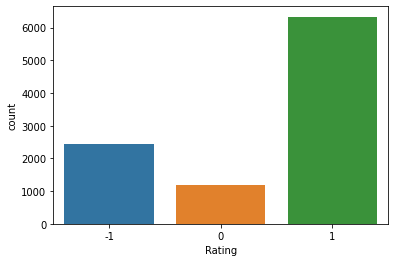

In [ ]:
sns.countplot(x=y)

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
df1=pd.DataFrame(X,columns=cv.get_feature_names())
df1['Review']=y
clf1 = setup(data = df1, target = 'Review')
# return best model
best = compare_models()

In [ ]:
# Splitting the data into test and train dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30)

In [ ]:
#Converting the  array into DataFrame
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head()

,aa,aaamsutra,aachar,aachari,aalishaan,aalo,aaloo,aalu,aam,aamra,aap,aar,aararot,aata,aati,aavula,aawww,aaya,ab,aback,abd,abdul,abdur,abhay,abhinav,abhisek,abhishek,abhiv,abhivir,abid,abil,abl,abli,abmianc,abot,abroad,abruptli,absenc,absent,absolut,...,yummmmmm,yummmmmmmmmmmmmmmmi,yummmmmyyyyyyyyyyyyyyyyyyyyyy,yummyy,yup,yyt,zaedan,zaffrani,zaffron,zafrani,zain,zakheedar,zakir,zara,zaroorat,zeera,zega,zen,zera,zero,zest,zesti,zillion,zing,zinger,zomato,zomatoand,zomatoo,zomatto,zombi,zomo,zomoto,zomtato,zomto,zone,zoomato,zucchini,zyada,ànd,éclat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#USING ARTIFICIAL NEURAL NETWORKS

In [39]:
from tensorflow import keras
train_yOHE = keras.utils.to_categorical(Y_train, num_classes = 3, dtype='int')
test_yOHE=keras.utils.to_categorical(Y_test, num_classes = 3, dtype='int')
# -1 as 2 , 1 as 1 and 0 as 0

In [55]:
model = Sequential()
model.add(Dense(220 , activation='relu', input_shape = (X.shape[0],X.shape[-1]))) # Input Layer
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(160 , activation='relu'))
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(80 , activation='relu'))
model.add(Dropout(0.5)) # Dropout Layer
model.add(Dense(40 , activation='relu'))
model.add(Dense(20 , activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, train_yOHE,epochs=70, batch_size=200,validation_data=(X_test,test_yOHE))

Epoch 1/70
35/35 [==============================] - 1s 18ms/step - loss: 1.0144 - accuracy: 0.5356 - val_loss: 0.7817 - val_accuracy: 0.6364
Epoch 2/70
35/35 [==============================] - 0s 14ms/step - loss: 0.7381 - accuracy: 0.6442 - val_loss: 0.5924 - val_accuracy: 0.7951
Epoch 3/70
35/35 [==============================] - 0s 14ms/step - loss: 0.5321 - accuracy: 0.8088 - val_loss: 0.4900 - val_accuracy: 0.8098
Epoch 4/70
35/35 [==============================] - 0s 14ms/step - loss: 0.3989 - accuracy: 0.8343 - val_loss: 0.4991 - val_accuracy: 0.8102
Epoch 5/70
35/35 [==============================] - 0s 14ms/step - loss: 0.3308 - accuracy: 0.8576 - val_loss: 0.5600 - val_accuracy: 0.8038
Epoch 6/70
35/35 [==============================] - 0s 14ms/step - loss: 0.2648 - accuracy: 0.8961 - val_loss: 0.6254 - val_accuracy: 0.7995
Epoch 7/70
35/35 [==============================] - 0s 14ms/step - loss: 0.2020 - accuracy: 0.9344 - val_loss: 0.7653 - val_accuracy: 0.8008
Epoch 8/70
35

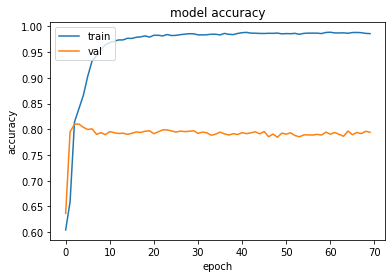

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

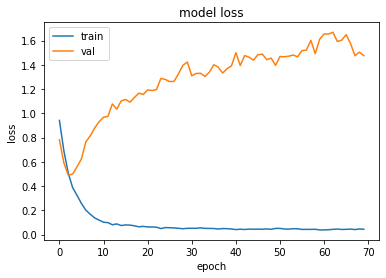

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [86]:
def Calculate_evaluation_matrices(Y_test,pred):
  print("Accuracy",accuracy_score(Y_test,pred))
  print("F1 Score", f1_score(Y_test,pred,average=None))
  print("Macro F1 Score", f1_score(Y_test,pred,average='macro'))
  print("Micro F1 Score", f1_score(Y_test,pred,average='micro'))
  print("Weighted F1 Score", f1_score(Y_test,pred,average='weighted'))
list1=[]
predictions=model.predict(X_test)
for i in predictions:
  if(np.argmax(i)==2):
    list1.append(-1)
  else:
    list1.append(np.argmax(i))
Calculate_evaluation_matrices(Y_test,list1)

Accuracy 0.7941078004686977
F1 Score [0.76933514 0.30333333 0.87897436]
Macro F1 Score 0.6505476115923878
Micro F1 Score 0.7941078004686977
Weighted F1 Score 0.7852887837228437


In [74]:
def Prediction_Using_DL(text):
  cor=[]
  cor.append(' '.join([word.lower() for word in text.split()]))
  alpha_cor=[]
  for i in range(len(cor)):
    alpha_cor.append(' '.join([word for word in cor[i].split() if word.isalpha()]))
  remove_stop=[]
  for i in range(len(alpha_cor)):
    remove_stop.append(' '.join([word for word in alpha_cor[i].split() if word not in stopwords.words('english')]))
  Stemed_cor=[]
  from nltk.stem import PorterStemmer
  ps=PorterStemmer()
  for i in range(len(remove_stop)):
    Stemed_cor.append(' '.join([ps.stem(word) for word in remove_stop[i].split()]))
  a1=np.zeros((1,X.shape[1]))
  d1=pd.DataFrame(a1,columns=cv.get_feature_names())
  for i in Stemed_cor[0].split(): 
    if i in t:
      d1[i][0]=d1[i][0]+1.0
  pred1=np.argmax(model.predict(d1.values))
  print(pred1)
  if(pred1==1):
    print("The Customer is very happy ")
  elif(pred1==0):
    print("The Customer is Satisfied")
  else:
    print("The Customer does not like it")

In [79]:
# Now taking the sample text to predict
text=input("Enter Restaurant Review: ")
Prediction_Using_DL(text)

Enter Restaurant Review: Khana bahut acha hai
The Customer is very happy 


#USING MACHINE LEARNING MODEL

In [ ]:
# Applying Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
pred2=rf.predict(X_test)

In [ ]:
# Dumping model
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(rf, f)

In [ ]:
# Calculation Evaluation Metrices and Accuracy
def Calculate_evaluation_matrices(Y_test,pred)
  print("Accuracy",accuracy_score(Y_test,pred))
  print("F1 Score", f1_score(Y_test,pred,average=None))
  print("Macro F1 Score", f1_score(Y_test,pred,average='macro'))
  print("Micro F1 Score", f1_score(Y_test,pred,average='micro'))
  print("Weighted F1 Score", f1_score(Y_test,pred,average='weighted'))

Accuracy 0.7860729829260127
F1 Score [0.74008811 0.05867971 0.87175827]
Macro F1 Score 0.5568420267440725
Micro F1 Score 0.7860729829260128
Weighted F1 Score 0.7397004999126684


In [60]:
# Prediction
def Prediction1(text):
    cor=[]
    cor.append(' '.join([word.lower() for word in text.split()]))
    alpha_cor=[]
    for i in range(len(cor)):
      alpha_cor.append(' '.join([word for word in cor[i].split() if word.isalpha()]))
    remove_stop=[]
    for i in range(len(alpha_cor)):
      remove_stop.append(' '.join([word for word in alpha_cor[i].split() if word not in stopwords.words('english')]))
    Stemed_cor=[]
    from nltk.stem import PorterStemmer
    ps=PorterStemmer()
    for i in range(len(remove_stop)):
      Stemed_cor.append(' '.join([ps.stem(word) for word in remove_stop[i].split()]))
    a1=np.zeros((1,X.shape[1]))
    d1=pd.DataFrame(a1,columns=cv.get_feature_names())
    for i in Stemed_cor[0].split(): 
      if i in t:
        d1[i][0]=d1[i][0]+1.0
    pred1=rf.predict(d1)
    if(pred1==1):
      print("The Customer is very happy ")
    elif(pred1==0):
      print("The Customer is Satisfied")
    else:
      print("The Customer does not like it")

In [ ]:
# Now taking the sample text to predict
text=input("Enter Restaurant Review: ")
Prediction(text)

Enter Restaurant Review: The food is tasty
The Customer is very happy 
